In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
import warnings

In [54]:
warnings.filterwarnings("ignore", category=UserWarning)

In [55]:
iris = datasets.load_iris()
df = pd.DataFrame(data = iris.data,columns = iris.feature_names)
df['target'] = iris.target
 
def map_target_names(target_value):
    return iris.target_names[target_value]
df['flower_name'] = df['target'].apply(map_target_names)
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
55,5.7,2.8,4.5,1.3,1,versicolor
29,4.7,3.2,1.6,0.2,0,setosa
18,5.7,3.8,1.7,0.3,0,setosa
123,6.3,2.7,4.9,1.8,2,virginica
17,5.1,3.5,1.4,0.3,0,setosa


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   flower_name        150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [57]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

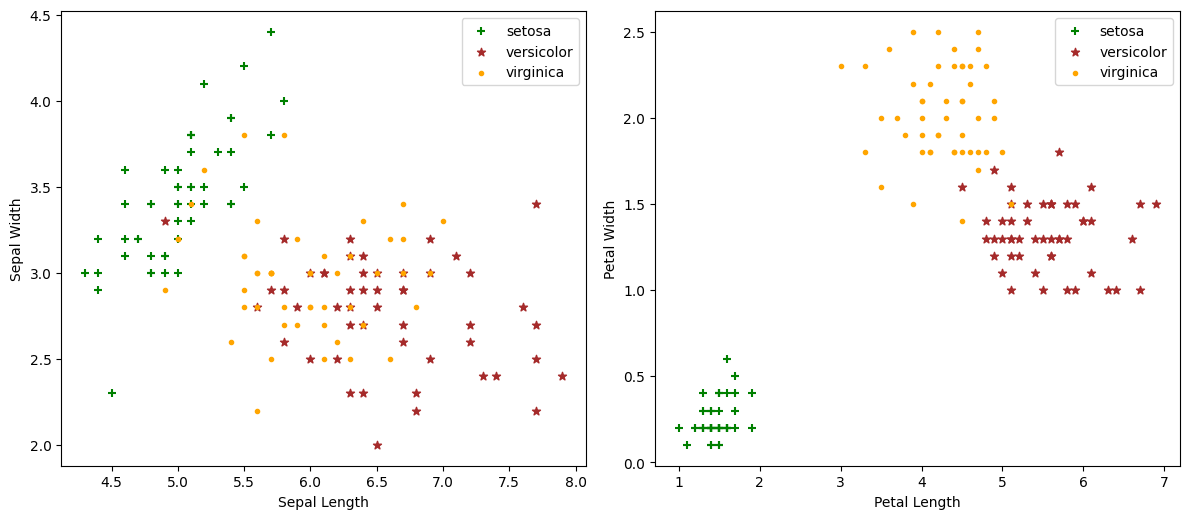

In [58]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], label="setosa", color="green", marker='+')
axs[0, 0].scatter(df2['sepal length (cm)'], df1['sepal width (cm)'], label="versicolor", color="brown", marker='*')
axs[0, 0].scatter(df1['sepal length (cm)'], df2['sepal width (cm)'], label="virginica", color="orange", marker='.')
axs[0, 0].set_xlabel('Sepal Length')
axs[0, 0].set_ylabel('Sepal Width')
axs[0, 0].legend()

axs[0, 1].scatter(df0['petal length (cm)'], df0['petal width (cm)'], label="setosa", color="green", marker='+')
axs[0, 1].scatter(df2['petal length (cm)'], df1['petal width (cm)'], label="versicolor", color="brown", marker='*')
axs[0, 1].scatter(df1['petal length (cm)'], df2['petal width (cm)'], label="virginica", color="orange", marker='.')
axs[0, 1].set_xlabel('Petal Length')
axs[0, 1].set_ylabel('Petal Width')
axs[0, 1].legend()

axs[1, :].flatten()[0].set_visible(False)
axs[1, :].flatten()[1].set_visible(False)

plt.tight_layout()
plt.show()


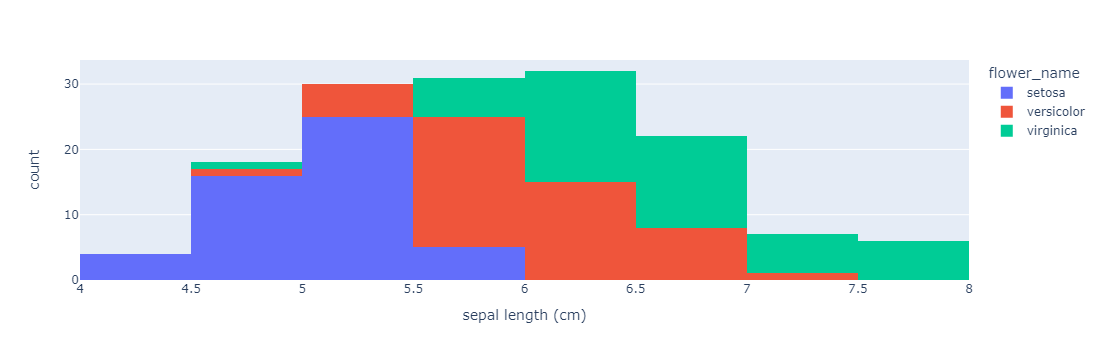

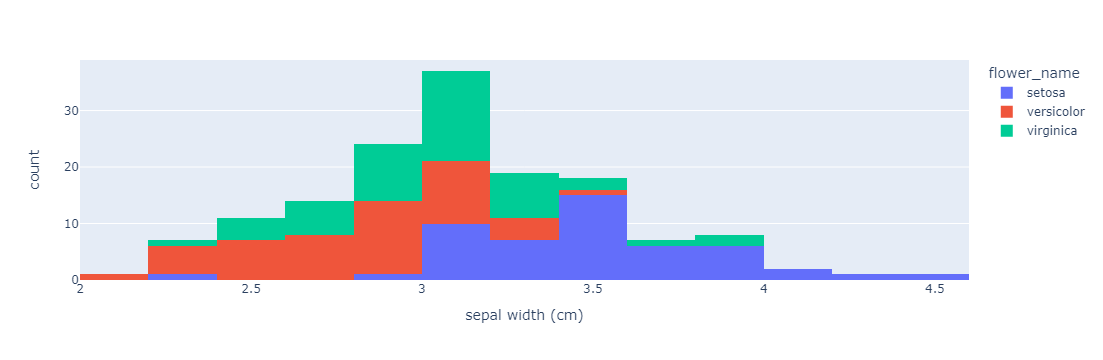

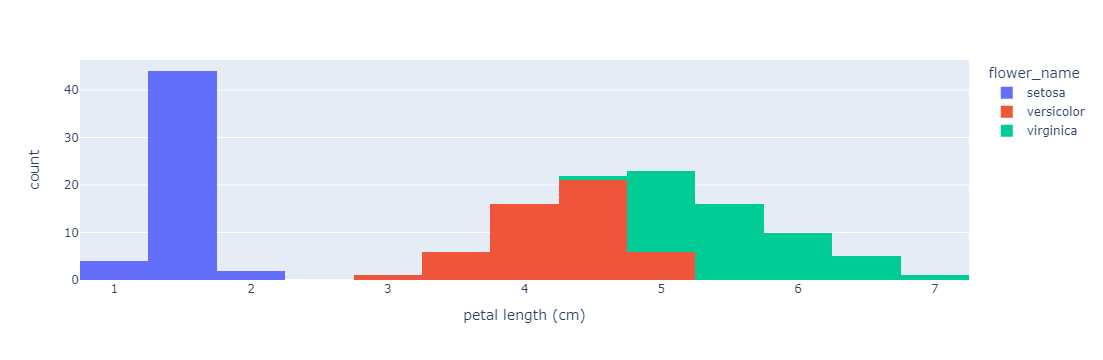

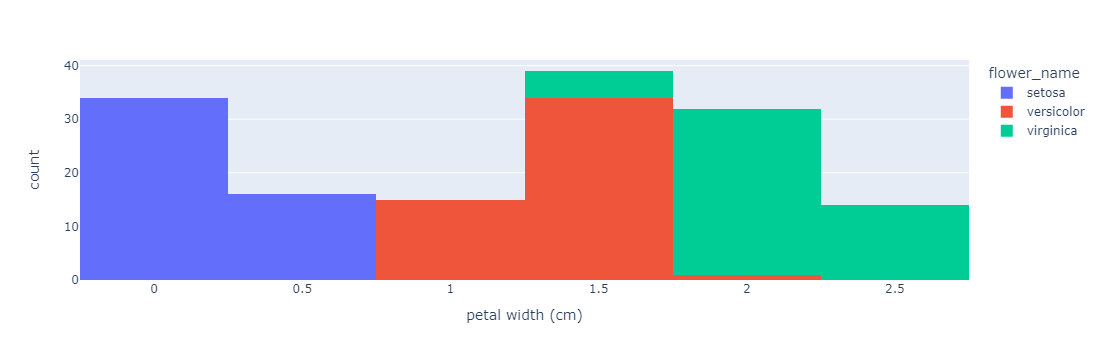

In [59]:
fig = px.histogram(data_frame=df, x='sepal length (cm)', color='flower_name')
fig.show()
fig = px.histogram(data_frame=df, x='sepal width (cm)', color='flower_name')
fig.show()
fig = px.histogram(data_frame=df, x='petal length (cm)', color='flower_name')
fig.show()
fig = px.histogram(data_frame=df, x='petal width (cm)', color='flower_name')
fig.show()

In [60]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [61]:
X = df.drop(['target','flower_name'], axis=1)
y = df['flower_name']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
model = LogisticRegression()

In [64]:
model.fit(X_train, y_train)

LogisticRegression()

In [65]:
y_pred = model.predict(X_test)

In [66]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred, average='weighted'))
print('Precision Score: ', precision_score(y_test, y_pred, average='weighted'))
print('F1 Score: ', f1_score(y_test, y_pred, average='weighted'))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy Score:  1.0
Recall Score:  1.0
Precision Score:  1.0
F1 Score:  1.0
Confusion Matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



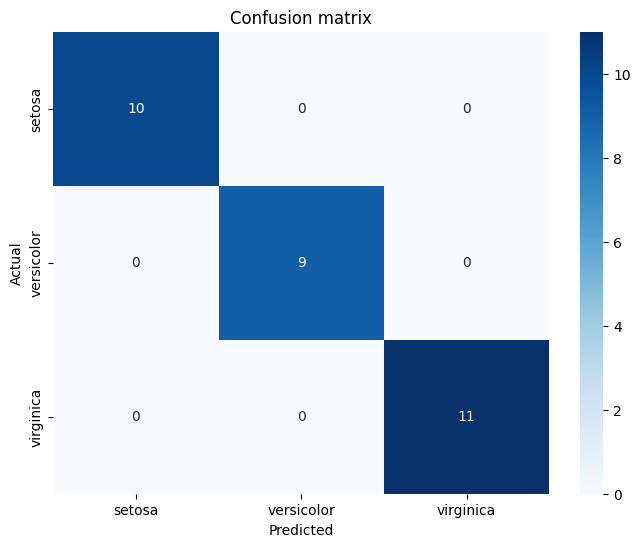

In [67]:
cm = confusion_matrix(y_test, y_pred)

class_labels = ['setosa', 'versicolor', 'virginica']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [70]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
78,6.0,2.9,4.5,1.5,1,versicolor
15,5.7,4.4,1.5,0.4,0,setosa
77,6.7,3.0,5.0,1.7,1,versicolor
126,6.2,2.8,4.8,1.8,2,virginica
22,4.6,3.6,1.0,0.2,0,setosa


In [75]:
from termcolor import colored
sepal_l = float(input("Enter sepal length (cm)"))
sepal_w = float(input("sepal width (cm)"))
petal_l = float(input("petal length (cm)"))
petal_w = float(input("petal width (cm)"))

result = model.predict([[sepal_l,sepal_w,petal_l,petal_w ]])

# Assuming result is a list containing the predicted flower name
predicted_flower = result[0].capitalize()  # Capitalize the first letter

# Remove brackets and colon
predicted_flower = predicted_flower.replace('[', '').replace(']', '')

# Add bold and color to the flower name
predicted_flower_bold = colored(predicted_flower, 'red', attrs=['bold'])

print(f"The flower is predicted to be {predicted_flower_bold}.")

Enter sepal length (cm) 6
sepal width (cm) 2.9
petal length (cm) 4.5
petal width (cm) 1.5


The flower is predicted to be Versicolor.
